In [1]:
import sys
import os

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path if not already added
if project_root not in sys.path:
    sys.path.append(project_root)

Distribution created with:
Number of Samples: 10000
Number of Features: 20
Skewness: 5
Kurtosis Change: False
Bimodality: False


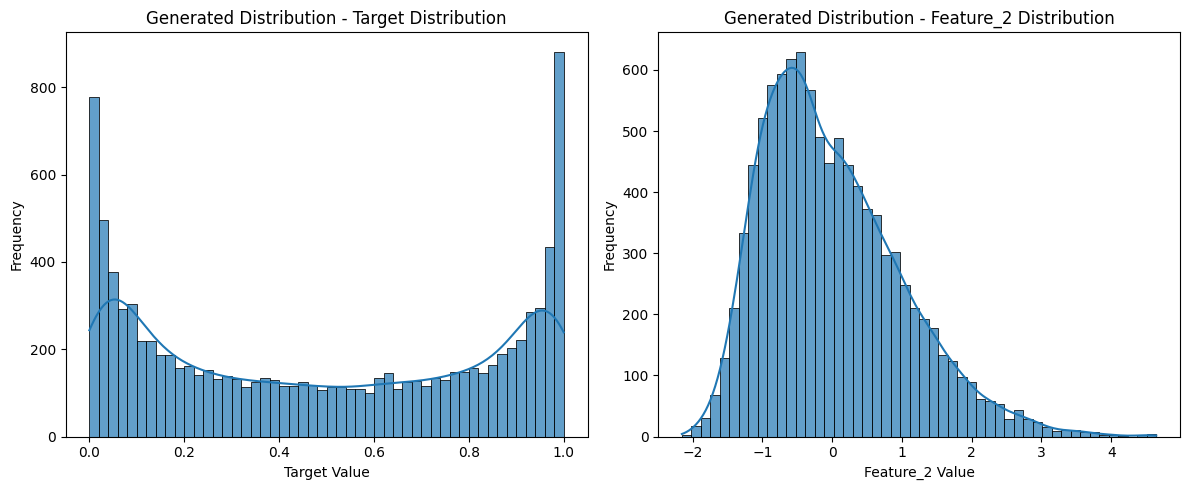

Metrics for Generated Distribution:
Mean: -0.0000
Standard Deviation: 1.0001
Skewness: 0.8251
Kurtosis: 0.6375

--------------------------------------------------



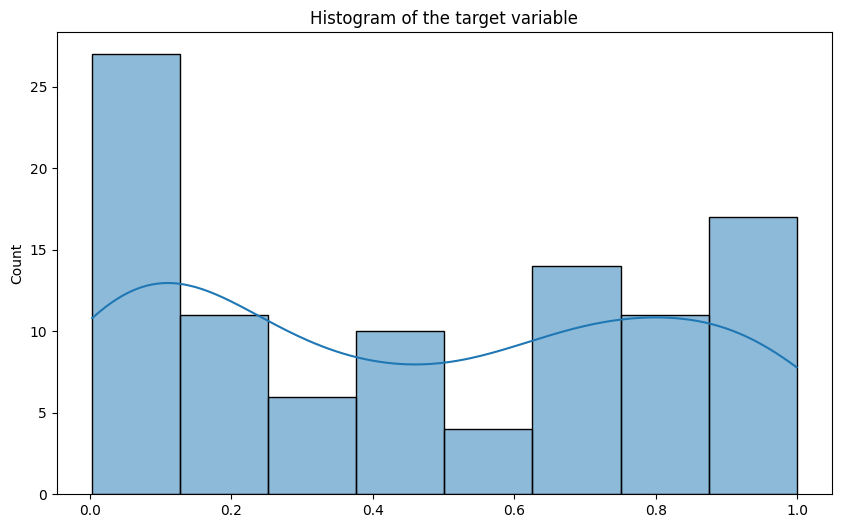

Train set size: 100
Test set size: 50
Calibration set size: 50
Train+Calibration set size: 150
 REMEMBERED  model_selection.py/ModelSelection.model_selection/a30525f03f0b2f77/ddc75bc18ed3daa5d81552847ff0e886
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best CV Score: -0.088
 REMEMBERED  model_selection.py/ModelSelection.model_selection/a30525f03f0b2f77/80ffa11f0378329706a614caebfcfba8
Best Parameters: {'alpha': 0.1, 'fit_intercept': True, 'solver': 'lsqr'}
Best CV Score: -0.016
KNeighborsRegressor: Test Score (MSE): 0.102
Ridge: Test Score (MSE): 0.017


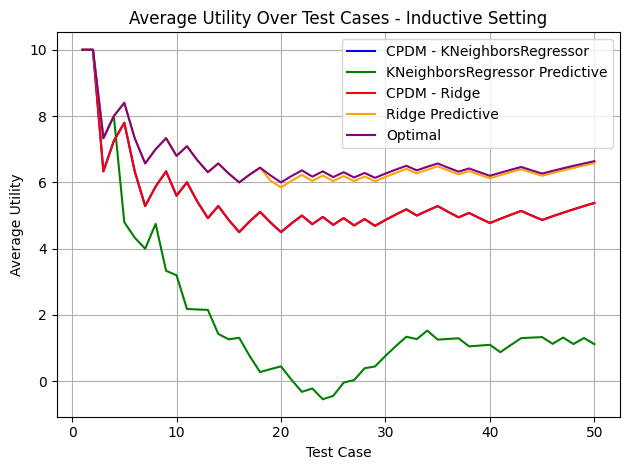

In [3]:
from src.main import Main

# Parameters for data generation
df_params = {
    'N': 10000,
    'F': 20,
    'skewness': 5,
    'kurtosis_change': False,
    'kurtosis_scale': 5,
    'mixture': False,
    'bimodal_separation': 15,
    'scaled': True,
}

# Utility values for decision outcomes
utility_dict = {
    'tp': 10,
    'tn': 2,
    'fp': -1,
    'fn': -8,
}

# Size of subset to be drawn from dataset
subset_size = 200

# Confidence level
epsilon = 0.05

# Data split ratios for training, testing, and calibration
datasplit_dict = {
    'train_test': 0.5,  # XX% of data initially goes to test+calibration
    'test_cal': 0.5,    # XX% of data goes to test
}

grid_search_space = {
    'knn': {
        'n_neighbors': list(range(1, 50)),  # try k = 1 to 20
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'ridge': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # regularization strength
        'fit_intercept': [True, False],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    }
}

config_dict = {
    'mode': "Inductive",
    'knn': True,
    'ridge': True,
    'gp': False,
    'bayesian_ridge': False,
    'optimal': True,
    'predictive': True,
    'model_selection': True, 
    'grid_search_space': grid_search_space
}

# Instantiate and run Main class
main = Main(df_params, utility_dict, subset_size, epsilon, datasplit_dict, config_dict)
main.run()